In [8]:
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.path import Path
import matplotlib.patches as patches
import numpy as np
# plt.rcParams.update({
#     "font.family": "serif",
# })

cm = 1/2.54  # centimeters in inches


## Trasformazione spazio-> rotazioni


In [9]:
def draw_plot_translation(transform,in_points, xmin=-15,xmax=15,ymin=-5,ymax=15,minrange=-10,maxrange=10,draw_polygon=False):
    '''
    transform: complex number that defines the transformation of the 2D space by sum (translation)
    in_points: numpy array of complex number to display 
    xmin, xmax, ymin,ymax: range of the 2D coordinate system
    draw_polygon: allow to draw a polygon with in_points (if True)
    '''

    transform=transform
    in_points=in_points
    #If in_points is just a complex number and not a numpy array convert it to array
    if not(isinstance(in_points, np.ndarray)):
        in_points=np.array([in_points])
    
    #Add teh first complex numebr to the and to close the polygon if needed  
    in_points=np.append(in_points,in_points[0])
        
    #apply the transformation (multiply transform with in_points)
    out_point=in_points + transform
    
    #set teh internal range for pyplot.plot
    xmin=xmin #max(xmin,out_point.real-1)
    xmax=xmax #min(xmax,out_point.real+1)
    ymin=ymin #min(ymin,out_point.imag-1)
    ymax=ymax #max(ymax,out_point.imag+1)
    
    #define figure , size, limits and ticks, force ratio 1:1
    fig, ax = plt.subplots()
    fig.set_size_inches(38*cm ,38*cm)
    ax.set_xlim(xmin, xmax)
    ax.set_ylim(ymin, ymax)
    ax.set_aspect(1)
    ax.set_xticks(np.arange(xmin, xmax, 1))
    ax.set_yticks(np.arange(ymin, ymax, 1))

    #Axis at (0,0)
    ax.spines['bottom'].set_position('zero')
    ax.spines['left'].set_position('zero')
    # ax.spines['bottom'].set_visible(False)
    # ax.spines['left'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    #Grid dashed
    ax.grid(True, ls='--')
    
    min_range=min(minrange,xmin,ymin)
    
    max_range=max(maxrange,xmax,ymax)
    #max_range=int(2*np.abs(transform*xmax))

    x_axis=np.arange(min_range,max_range,1)
    y_axis=np.arange(min_range,max_range,1)*1j

    #Transform al the coordinate system

    x_axis_trans=transform + x_axis
    y_axis_trans = transform + y_axis
    
    #size of the point markers of the new coordinate system
    marker_size=3

    #plot the transformed coordinate system
    # for n in range(min_range,max_range):
    #     ax.plot((x_axis_trans+1j*transform*n).real,(x_axis_trans+1j*transform*n).imag,'o', ls='--',markersize=marker_size, color='gray')
    #     ax.plot((y_axis_trans+n*transform).real,(y_axis_trans+n*transform).imag,'go',ls='--',markersize=marker_size,color='gray')
      
    #size of the point markers and labels fonts
    marker_size=6
    font_size=12
    
    # set line style if draw polygon
    if draw_polygon:
        line_style1='-'
        line_style2='--'
    else:
        line_style1=''
        line_style2=''
        
    #plot input_points in red
    ax.plot(in_points.real,in_points.imag,'ro',linestyle=line_style1,markersize=marker_size)
    #plot outpout points in blue
    ax.plot(out_point.real,out_point.imag,'bo',linestyle=line_style2,markersize=marker_size)
    #plot the basis transformation z and jz
    ax.plot(transform.real,transform.imag,'mo',markersize=marker_size)
    #ax.plot(-transform.imag,transform.real,'mo',markersize=marker_size)
    #label for z, ij
    ax.annotate('$z$',xy=[transform.real,transform.imag],xytext=[10,0],fontsize=font_size,textcoords='offset points',color='magenta')
    #ax.annotate('$j\cdot z$',xy=[(1j*transform).real,(1j*transform).imag],xytext=[10,0],fontsize=font_size,textcoords='offset points',color='m')
    #labels for all in_points and out_points in LaTeX
    for index in range(0,len(in_points)-1):
        #print("w{}".format(index))
        ax.annotate('$w_{}$'.format(index),xy=[(in_points[index]).real,(in_points[index]).imag],xytext=[10,0],fontsize=font_size,textcoords='offset points',color='red')
        ax.annotate('$w_{}+z$'.format(index),xy=[(out_point[index]).real,(out_point[index]).imag],xytext=[10,0],fontsize=font_size,textcoords='offset points',color='blue')


    plt.show()

In [10]:
def draw_plot_origin(transform,in_points,origin=0+0j, xmin=-15,xmax=15,ymin=-5,ymax=15,minrange=-10,maxrange=10,draw_polygon=False):
    '''
    transform: complex number that defines the transformation of the 2D space by multiplication (rotation+scaling)
    in_points: numpy array of complex number to display 
    xmin, xmax, ymin,ymax: range of the 2D coordinate system
    draw_polygon: allow to draw a polygon with in_points (if True)
    '''
    origin=origin
    transform=transform
   
    in_points=in_points
    #If in_points is just a complex number and not a numpy array convert it to array
    if not(isinstance(in_points, np.ndarray)):
        in_points=np.array([in_points])
    
    #Add teh first complex numebr to the and to close the polygon if needed  
    in_points=np.append(in_points,in_points[0])
        
    #apply the transformation (multiply transform with in_points)
    out_point=(in_points -origin) * transform + origin
    
    #set teh internal range for pyplot.plot
    xmin=xmin #max(xmin,out_point.real-1)
    xmax=xmax #min(xmax,out_point.real+1)
    ymin=ymin #min(ymin,out_point.imag-1)
    ymax=ymax #max(ymax,out_point.imag+1)
    
    #define figure , size, limits and ticks, force ratio 1:1
    fig, ax = plt.subplots()
    fig.set_size_inches(38*cm ,38*cm)
    ax.set_xlim(xmin, xmax)
    ax.set_ylim(ymin, ymax)
    ax.set_aspect(1)
    ax.set_xticks(np.arange(xmin, xmax, 1))
    ax.set_yticks(np.arange(ymin, ymax, 1))

    #Axis at new origin

    #ax.spines['bottom'].set_position(('data',origin.real))
    #ax.spines['left'].set_position(('data',origin.imag))
    
    ax.spines['bottom'].set_position('zero')
    ax.spines['left'].set_position('zero')
    # ax.spines['bottom'].set_visible(False)
    # ax.spines['left'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    #Grid dashed
    ax.grid(True, ls='--')
    
    min_range=min(minrange,xmin,ymin)
    
    max_range=max(maxrange,xmax,ymax)
    #max_range=int(2*np.abs(transform*xmax))

    x_axis=np.arange(min_range,max_range,1)
    y_axis=np.arange(min_range,max_range,1)*1j

    #Transform al the coordinate system

    x_axis_trans=transform * x_axis
    y_axis_trans = transform * y_axis
    
    #size of the point markers of the new coordinate system
    marker_size=3

    #plot the transformed coordinate system
    for n in range(min_range,max_range):
        ax.plot((origin+x_axis_trans+1j*transform*n).real,(origin+x_axis_trans+1j*transform*n).imag,'o', ls='--',markersize=marker_size, color='gray',linewidth=0.5)
        ax.plot((origin+y_axis_trans+n*transform).real,(origin+y_axis_trans+n*transform).imag,'go',ls='--',markersize=marker_size,color='gray',linewidth=0.5)
      
    #size of the point markers and labels fonts
    marker_size=6
    font_size=12
    
    # set line style if draw polygon
    if draw_polygon:
        line_style1='-'
        line_style2='--'
    else:
        line_style1=''
        line_style2=''
        
    ax.vlines(origin.real,ymin,ymax)
    ax.hlines(origin.imag,xmin,xmax)
    #plot input_points in red
    ax.plot(in_points.real,in_points.imag,'ro',linestyle=line_style1,markersize=marker_size)
    #plot outpout points in blue
    ax.plot(out_point.real,out_point.imag,'bo',linestyle=line_style2,markersize=marker_size)
    #plot the basis transformation z and jz
    ax.plot((origin+transform).real,(origin+transform).imag,'mo',markersize=marker_size)
    ax.plot(origin.real+(-transform).imag,origin.imag +transform.real,'mo',markersize=marker_size)
    #label for z, ij
    ax.annotate('$z$',xy=[(origin+transform).real,(origin+transform).imag],xytext=[10,0],fontsize=font_size,textcoords='offset points',color='magenta')
    ax.annotate('$j\cdot z$',xy=[(origin+1j*transform).real,(origin+1j*transform).imag],xytext=[10,0],fontsize=font_size,textcoords='offset points',color='m')
    #labels for all in_points and out_points in LaTeX
    for index in range(0,len(in_points)-1):
        #print("w{}".format(index))
        ax.annotate('$w_{}$'.format(index),xy=[(in_points[index]).real,(in_points[index]).imag],xytext=[10,0],fontsize=font_size,textcoords='offset points',color='red')
        ax.annotate('$z\cdot w_{}$'.format(index),xy=[(out_point[index]).real,(out_point[index]).imag],xytext=[10,0],fontsize=font_size,textcoords='offset points',color='blue')

 
  
    ax.set_title("Origin O={:.2f}+{:.2f}j \n Transformation $(w-O)\cdot z + O$".format(origin.real,origin.imag))
    plt.show()

In [11]:
#Parameters
#z_transformation=np.exp(1j*np.pi)
z_transformation=1+2j#2*np.exp(1j*np.pi/3)
#w_input=2-3j #np.array([3+2j])
w_input=np.array([4+1j,1+2j,2-2j])
origin=0
xmin=-10
xmax=15
ymin=-10
ymax=15

# Traslazione

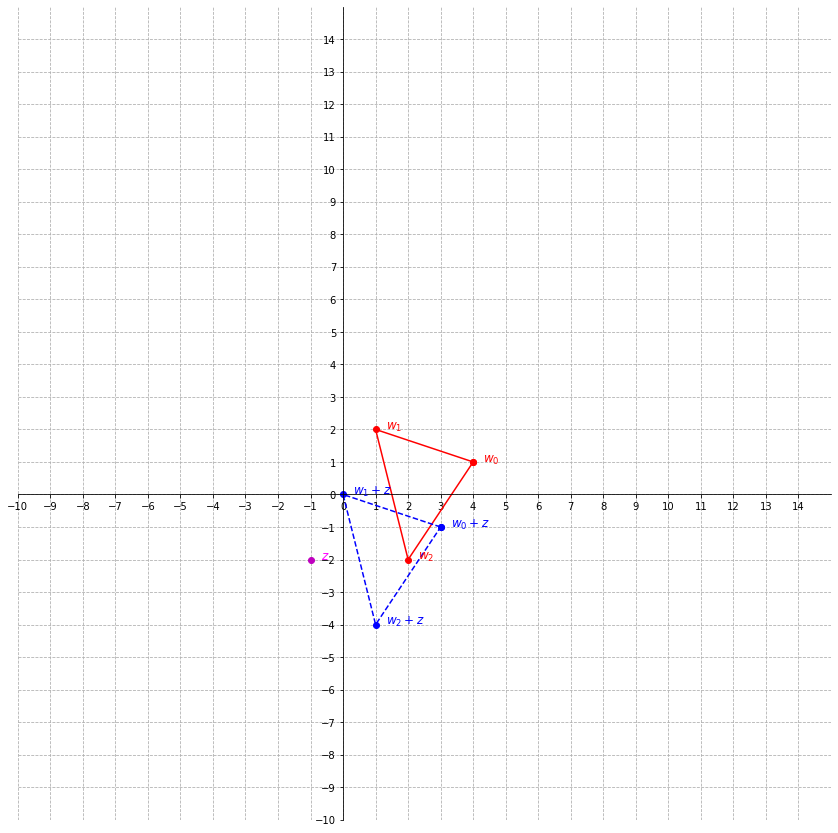

In [12]:
draw_plot_translation(transform=-w_input[1],in_points=w_input,ymin=ymin,ymax=ymax,xmin=xmin,xmax=xmax,draw_polygon=True)#,maxrange=50,minrange=-50)

# Rotazione con origine $O$

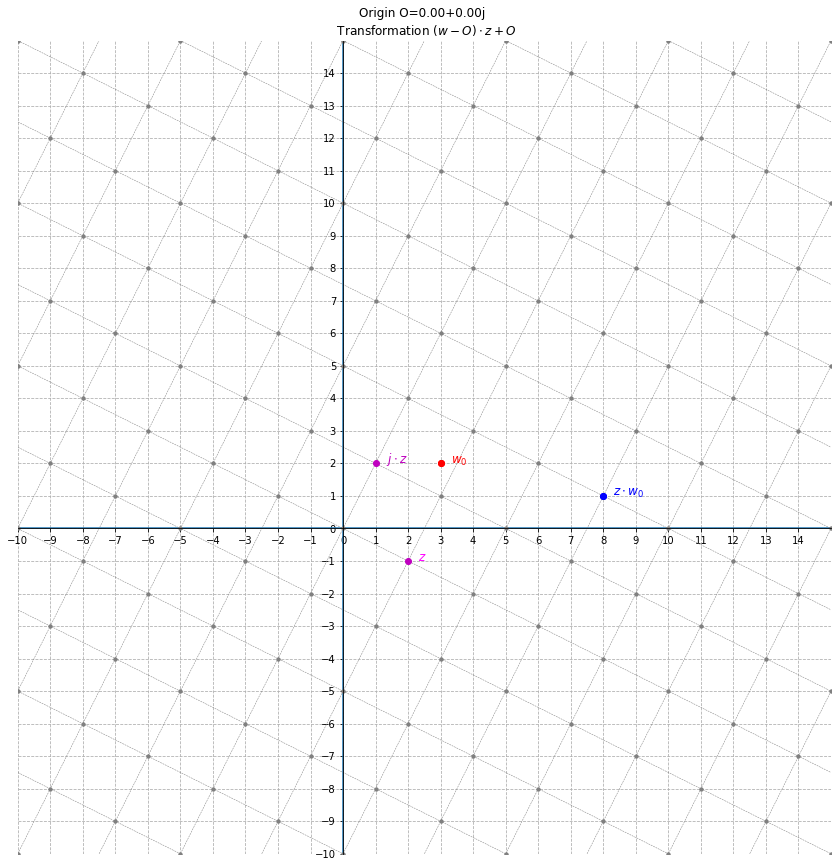

In [49]:
#z_transformation=np.exp(1j*np.pi)
z_transformation=2-1j
#1.5*np.exp(1j*np.deg2rad(70)) #   1+2j#2*np.exp(1j*np.pi/3)
#w_input=2-3j #np.array([3+2j])
w_input=3+2j#np.array([3,6,5+2j])
origin=0
xmin=-10
xmax=15
ymin=-10
ymax=15



draw_plot_origin(transform=z_transformation,in_points=w_input,origin=origin,ymin=ymin,ymax=ymax,xmin=xmin,xmax=xmax,draw_polygon=True)


In [18]:
np.sqrt(2)*1j

1.4142135623730951j